In [1]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV
from hypopt import GridSearch

In [2]:
model_path = "/neurospin/dico/jchavas/Runs/70_self-supervised_two-regions/Output/2024-05-14/13-29-46_193"
ukb_emb_file = f"{model_path}/ukb_embeddings/full_embeddings.csv"
schiz_emb_file = f"{model_path}/schiz_embeddings/full_embeddings.csv"
schiz_path = "/neurospin/dico/data/deep_folding/current/datasets/schiz/aymeric_stratification/with_sub"
schiz_label_file = f"{schiz_path}/used_schiz_subjects.csv"
train_file = f"{schiz_path}/train_subjects.csv"
val_file = f"{schiz_path}/val_subjects.csv"
test_intra_file = f"{schiz_path}/test_intra_subjects.csv"
test_file = f"{schiz_path}/test_subjects.csv"

In [3]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.180816,-4.897371,28.536537,-11.383924,47.455235,-3.330361,585.162540,39.416397,136.354970,-8.809567,...,418.008300,505.644620,-8.269193,612.348500,-2.275461,740.038900,202.412400,-3.711234,-1.518374,821.934630
sub-1000458,-6.022163,999.522000,-7.739861,358.401060,481.296840,204.329510,-1.715779,220.602130,-0.789335,769.697400,...,-6.893018,-7.142817,1126.471100,872.819600,-6.195147,1962.500000,2433.680000,-29.772533,-1.392787,885.703250
sub-1000575,-1.005655,263.915680,-3.695407,181.066200,-1.083727,8.280797,142.268260,-0.375403,-1.623013,-0.607096,...,139.277950,611.835200,-0.387257,55.942050,110.957100,-0.578239,-3.586959,-6.502998,-2.406025,-1.916910
sub-1000606,-2.354031,-3.332583,193.950880,438.300800,-6.503218,268.049440,-4.859503,119.222630,310.430360,33.425710,...,-6.767321,638.190000,-2.282982,-0.248651,-3.481864,480.513460,925.453500,-11.805409,-1.833706,459.084960
sub-1000963,110.753600,-0.506234,-5.651434,-7.679121,-0.261149,231.482640,132.407850,158.000730,502.931700,-2.943109,...,646.462300,429.742250,-5.734656,-5.669436,63.194412,-0.240860,-4.655399,50.486145,-2.241343,-3.994020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,413.114230,136.513950,224.666240,304.583770,-5.199847,-0.148056,915.745540,-4.321250,17.398360,-1.857801,...,607.842400,701.759640,204.367860,41.380375,1253.008200,-10.264941,-14.487966,765.335800,656.719850,-4.528693
sub-6023808,155.857590,360.926880,-5.820479,55.233690,308.276730,237.900340,240.639220,385.216800,-4.064117,-1.765099,...,358.483640,247.298140,-0.394112,-1.780098,-2.005075,392.128200,156.961790,-5.403909,-5.422105,-3.775630
sub-6023847,49.364240,825.855300,-3.384734,1326.432400,-5.850205,400.664300,13.516435,22.693916,-0.208967,492.883640,...,-5.913758,57.907990,1184.154900,-1.234441,713.521200,-1.671705,568.583800,-15.212290,314.058750,-2.757293


In [4]:
schiz_emb = pd.read_csv(schiz_emb_file, index_col=0)
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,103.223816,-0.440251,124.970000,377.182830,-2.269716,57.124783,189.243850,508.104550,-4.026789,-5.902906,...,-7.331318,76.385796,232.287380,625.558040,-4.027014,1174.561200,1889.794800,-18.287703,-3.196200,882.563050
sub-10189_ses-1,-5.996229,-6.673157,32.556404,-8.541675,-0.931960,-2.195915,-2.640662,-2.558952,379.189730,-1.237285,...,21.514706,877.521800,-9.768738,294.909850,-5.279502,528.294900,26.770517,-5.456931,-3.153817,795.991640
sub-10193_ses-1,239.131210,-3.579747,-1.365004,27.371353,-2.228070,422.816740,-1.743193,295.564330,92.311806,-2.140296,...,345.507320,761.475400,-7.194172,-8.003268,-1.555861,-2.420947,-4.326920,497.335700,-4.663386,-6.094064
sub-10206_ses-1,-1.789805,-8.855861,348.865260,-16.001402,61.132030,-5.587075,664.299500,-2.101304,266.252140,-10.255367,...,565.047060,695.009900,-12.153379,798.299740,-2.947157,650.428000,-1.646483,148.454220,-1.242439,1107.346700
sub-10217_ses-1,423.436900,642.574770,-5.095116,507.757420,-2.876375,423.944670,392.958650,390.665600,24.693045,-1.200493,...,40.426743,-0.303988,638.209900,-3.979492,579.852500,50.974140,483.153960,-9.969148,102.057710,-3.928583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-st110288_ses-v1,-2.793392,888.914860,-10.249948,-3.217851,457.660860,414.385440,127.560040,-1.862466,467.637900,764.990700,...,806.603000,-0.813508,409.038500,-6.274197,289.039800,-1.545569,-8.049994,-1.136756,-0.671398,-9.429818
sub-va110289_ses-v1,553.247740,56.678158,-0.321379,-3.849773,-2.407576,69.208480,960.916750,-2.398677,209.364150,-5.121583,...,1074.201900,507.886100,-1.889275,-3.882226,1025.475000,-11.339704,-18.321608,1486.016400,309.213530,-9.192932
sub-ye110322_ses-v1,-2.569386,-3.757127,-0.568615,-2.834430,-3.027795,51.095480,-1.896818,-0.796262,295.323940,-1.088357,...,97.485990,903.844500,-7.057431,-1.347389,-2.107603,95.371360,-2.386774,-3.644438,-2.810691,162.551960


In [5]:
schiz_label = pd.read_csv(schiz_label_file, index_col=0)
schiz_label

,sex,age,diagnosis,study,site
participant_id,,,,,
sub-INV07WT2ZL3,M,29.0,control,BSNIP,Dallas
sub-INV0AL14J6U,M,43.0,schizophrenia,BSNIP,Dallas
sub-INV14XK7P6E,M,30.0,control,BSNIP,Dallas
sub-INV1HXNTXYF,F,18.0,control,BSNIP,Dallas
sub-INV1XCNF4J5,F,25.0,control,BSNIP,Dallas
...,...,...,...,...,...
sub-ESOC10060_ses-v1,F,26.0,control,PRAGUE,PRAGUE
sub-ESOC10019_ses-v1,F,28.0,control,PRAGUE,PRAGUE
sub-ESOC10063_ses-v1,M,31.0,control,PRAGUE,PRAGUE


In [6]:
schiz_train = pd.read_csv(train_file, header=None)
schiz_val = pd.read_csv(val_file, header=None)
schiz_test_intra = pd.read_csv(test_intra_file, header=None)
schiz_test = pd.read_csv(test_file, header=None)
schiz_train

,0
0,sub-ESOC10104_ses-v1
1,sub-NM2020_ses-v1
2,sub-or130001_ses-v1
3,sub-ESOC10112_ses-v1
4,sub-CC6287_ses-v1
...,...
908,sub-HC027_ses-1
909,sub-HC010_ses-1
910,sub-SS086_ses-1
911,sub-HC023_ses-1


In [7]:
np.unique(schiz_label.diagnosis)

array(['control', 'schizophrenia'], dtype=object)

# UKBioBank

In [8]:
norm = ukb_emb.apply(np.linalg.norm, axis=1)
ukb_emb = ukb_emb.div(norm, axis=0)

In [9]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.000024,-0.000650,0.003785,-0.001510,0.006295,-0.000442,0.077619,0.005228,0.018087,-0.001169,...,0.055447,0.067072,-0.001097,0.081225,-0.000302,0.098163,0.026849,-0.000492,-0.000201,0.109026
sub-1000458,-0.000465,0.077242,-0.000598,0.027697,0.037194,0.015790,-0.000133,0.017048,-0.000061,0.059481,...,-0.000533,-0.000552,0.087053,0.067451,-0.000479,0.151660,0.188072,-0.002301,-0.000108,0.068446
sub-1000575,-0.000177,0.046514,-0.000651,0.031912,-0.000191,0.001459,0.025074,-0.000066,-0.000286,-0.000107,...,0.024547,0.107834,-0.000068,0.009860,0.019556,-0.000102,-0.000632,-0.001146,-0.000424,-0.000338
sub-1000606,-0.000319,-0.000452,0.026309,0.059454,-0.000882,0.036360,-0.000659,0.016172,0.042109,0.004534,...,-0.000918,0.086568,-0.000310,-0.000034,-0.000472,0.065180,0.125534,-0.001601,-0.000249,0.062273
sub-1000963,0.019919,-0.000091,-0.001016,-0.001381,-0.000047,0.041631,0.023813,0.028416,0.090450,-0.000529,...,0.116263,0.077287,-0.001031,-0.001020,0.011365,-0.000043,-0.000837,0.009080,-0.000403,-0.000718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,0.051358,0.016971,0.027930,0.037866,-0.000646,-0.000018,0.113845,-0.000537,0.002163,-0.000231,...,0.075567,0.087243,0.025407,0.005144,0.155774,-0.001276,-0.001801,0.095146,0.081643,-0.000563
sub-6023808,0.030138,0.069792,-0.001125,0.010680,0.059611,0.046002,0.046532,0.074488,-0.000786,-0.000341,...,0.069319,0.047819,-0.000076,-0.000344,-0.000388,0.075825,0.030351,-0.001045,-0.001048,-0.000730
sub-6023847,0.005708,0.095499,-0.000391,0.153383,-0.000676,0.046331,0.001563,0.002624,-0.000024,0.056995,...,-0.000684,0.006696,0.136931,-0.000143,0.082509,-0.000193,0.065749,-0.001759,0.036316,-0.000319


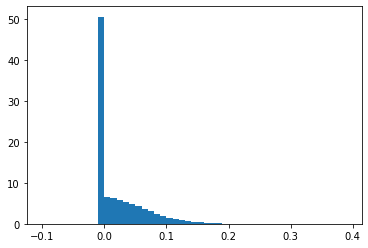

In [10]:
p = plt.hist(ukb_emb.values.ravel(), bins=np.arange(-0.1,0.4,0.01), density=True)

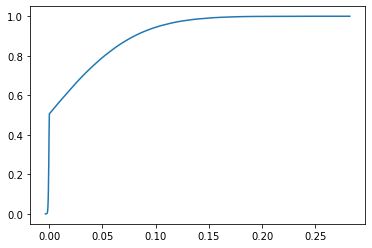

In [11]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [12]:
X2[int(N*0.59)]

0.01321617550622521

In [13]:
len(ukb_emb)

21051

In [14]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [15]:
ukb_positive

dim234    0.953684
dim120    0.943328
dim369    0.889269
dim15     0.887464
dim58     0.883853
            ...   
dim114    0.104413
dim461    0.086552
dim40     0.075721
dim491    0.075151
dim137    0.062467
Length: 512, dtype: float64

In [16]:
ukb_positive[10:50]

dim490    0.854021
dim128    0.840863
dim96     0.839533
dim296    0.839390
dim102    0.834497
dim100    0.834402
dim255    0.824236
dim309    0.819581
dim285    0.813453
dim69     0.810365
dim220    0.806470
dim480    0.803572
dim489    0.799867
dim27     0.796542
dim462    0.793026
dim494    0.787374
dim407    0.780533
dim364    0.780105
dim321    0.774263
dim400    0.772077
dim149    0.768800
dim67     0.768182
dim420    0.768135
dim176    0.767755
dim272    0.765997
dim284    0.760011
dim54     0.758634
dim473    0.758539
dim485    0.757779
dim277    0.757589
dim209    0.757589
dim405    0.756829
dim379    0.756496
dim333    0.756496
dim253    0.745903
dim266    0.744383
dim373    0.743908
dim402    0.737162
dim47     0.737115
dim109    0.736687
dtype: float64

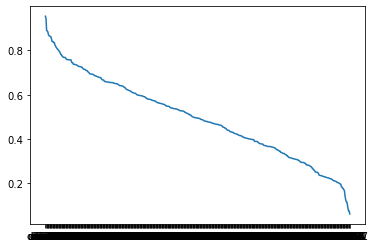

In [17]:
plt.plot(ukb_positive)

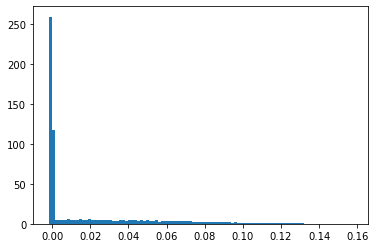

In [18]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

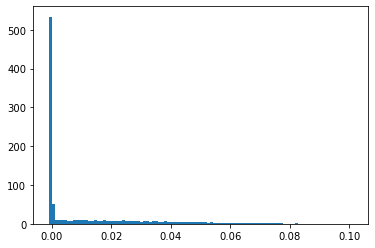

In [19]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

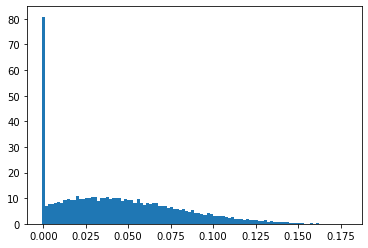

In [20]:
p = plt.hist(ukb_emb.loc[:,"dim188"], bins=100, density=True)

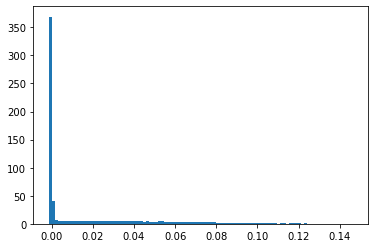

In [21]:
p = plt.hist(ukb_emb.loc[:,"dim10"], bins=100, density=True)

# Schizophrene

In [22]:
norm = schiz_emb.apply(np.linalg.norm, axis=1)
schiz_emb = schiz_emb.div(norm, axis=0)

In [23]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [24]:
# visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

In [25]:
# plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [26]:
# visual_schiz_emb = reducer.transform(schiz_emb)

In [27]:
# plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)
# plt.scatter(visual_schiz_emb[:,0], visual_schiz_emb[:,1], c='red', s=20, alpha=1)

In [28]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)

In [29]:
schiz_order = schiz_emb.copy()
schiz_order.loc["ukb_positive",:] = ukb_positive
schiz_order

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,0.010478,-0.000045,0.012685,0.038287,-0.000230,0.005799,0.019210,0.051577,-0.000409,-0.000599,...,-0.000744,0.007754,0.023579,0.063499,-0.000409,0.119228,0.191830,-0.001856,-0.000324,0.089587
sub-10189_ses-1,-0.000857,-0.000953,0.004651,-0.001220,-0.000133,-0.000314,-0.000377,-0.000366,0.054168,-0.000177,...,0.003073,0.125355,-0.001395,0.042128,-0.000754,0.075468,0.003824,-0.000780,-0.000451,0.113709
sub-10193_ses-1,0.039543,-0.000592,-0.000226,0.004526,-0.000368,0.069918,-0.000288,0.048875,0.015265,-0.000354,...,0.057134,0.125919,-0.001190,-0.001323,-0.000257,-0.000400,-0.000716,0.082240,-0.000771,-0.001008
sub-10206_ses-1,-0.000192,-0.000952,0.037484,-0.001719,0.006568,-0.000600,0.071375,-0.000226,0.028607,-0.001102,...,0.060711,0.074675,-0.001306,0.085773,-0.000317,0.069885,-0.000177,0.015951,-0.000133,0.118979
sub-10217_ses-1,0.065184,0.098918,-0.000784,0.078164,-0.000443,0.065262,0.060492,0.060139,0.003801,-0.000185,...,0.006223,-0.000047,0.098246,-0.000613,0.089263,0.007847,0.074377,-0.001535,0.015711,-0.000605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,0.063459,0.006501,-0.000037,-0.000442,-0.000276,0.007938,0.110220,-0.000275,0.024015,-0.000587,...,0.123214,0.058256,-0.000217,-0.000445,0.117625,-0.001301,-0.002102,0.170450,0.035468,-0.001054
sub-ye110322_ses-v1,-0.000465,-0.000679,-0.000103,-0.000513,-0.000548,0.009240,-0.000343,-0.000144,0.053406,-0.000197,...,0.017629,0.163450,-0.001276,-0.000244,-0.000381,0.017247,-0.000432,-0.000659,-0.000508,0.029396
sub-yh100442_ses-v1,-0.000111,-0.000132,-0.000234,-0.000779,0.086906,-0.000004,0.041751,0.017625,-0.000509,-0.000392,...,0.076492,0.032247,-0.000730,0.041887,-0.000940,0.090417,-0.000101,0.035077,-0.000872,-0.000074


In [30]:
schiz_order = schiz_order.sort_values(schiz_order.last_valid_index(), ascending=False, axis=1)

In [31]:
schiz_order

,dim234,dim120,dim369,dim15,dim58,dim315,dim280,dim481,dim188,dim22,...,dim308,dim382,dim453,dim385,dim99,dim114,dim461,dim40,dim491,dim137
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,0.061141,0.052946,0.059364,0.034721,0.030865,0.062213,0.051239,0.098106,0.031623,0.072125,...,-0.000857,-0.000064,0.017500,-0.000345,0.020330,-0.000169,0.005845,-0.000386,-0.000122,0.001701
sub-10189_ses-1,0.156576,0.057545,0.097757,0.075871,0.076570,-0.000441,0.061455,0.142043,-0.000203,0.147104,...,-0.000971,-0.000507,0.009329,-0.000281,-0.000336,-0.000409,-0.000434,-0.000979,-0.000378,-0.000566
sub-10193_ses-1,0.054710,0.113495,0.022004,0.020343,0.020863,0.040882,0.089798,0.051616,0.097693,0.172239,...,-0.000876,-0.000542,-0.000455,-0.000882,-0.000522,-0.000633,-0.000876,-0.001600,-0.000289,-0.001008
sub-10206_ses-1,0.128149,-0.000035,0.097523,0.072938,0.024594,0.019844,0.000506,0.131570,0.002722,0.083045,...,-0.000972,-0.000195,0.023051,0.015033,0.002222,-0.000249,0.021395,-0.000354,-0.000144,-0.000075
sub-10217_ses-1,0.089638,0.117154,0.070300,0.018999,0.083786,0.050873,0.144903,0.104514,0.055263,0.081661,...,-0.000272,-0.000540,-0.000340,-0.000725,-0.000289,-0.000608,-0.000648,-0.001476,-0.000261,-0.000660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,0.049362,0.023496,0.076521,0.012911,0.006122,0.106260,0.045898,0.017944,0.051755,-0.000052,...,0.003236,0.003763,-0.000487,-0.000061,-0.000401,-0.000721,-0.000263,-0.000410,-0.000032,-0.000300
sub-ye110322_ses-v1,0.163964,0.127132,0.123092,0.071090,0.092367,0.037255,0.123268,0.143903,0.038751,0.178665,...,-0.001105,-0.000598,-0.000319,-0.000752,-0.000697,-0.000923,-0.000935,-0.001694,-0.000536,-0.000965
sub-yh100442_ses-v1,0.018278,-0.000102,0.001166,0.013884,-0.000204,0.155317,-0.000672,-0.000124,0.093587,0.033170,...,-0.000916,0.000805,-0.000129,-0.000013,-0.000164,-0.000082,0.011256,0.036557,0.000560,-0.000053


# Fit on schiz datasets

In [32]:
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim503,dim504,dim505,dim506,dim507,dim508,dim509,dim510,dim511,dim512
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,0.010478,-0.000045,0.012685,0.038287,-0.000230,0.005799,0.019210,0.051577,-0.000409,-0.000599,...,-0.000744,0.007754,0.023579,0.063499,-0.000409,0.119228,0.191830,-0.001856,-0.000324,0.089587
sub-10189_ses-1,-0.000857,-0.000953,0.004651,-0.001220,-0.000133,-0.000314,-0.000377,-0.000366,0.054168,-0.000177,...,0.003073,0.125355,-0.001395,0.042128,-0.000754,0.075468,0.003824,-0.000780,-0.000451,0.113709
sub-10193_ses-1,0.039543,-0.000592,-0.000226,0.004526,-0.000368,0.069918,-0.000288,0.048875,0.015265,-0.000354,...,0.057134,0.125919,-0.001190,-0.001323,-0.000257,-0.000400,-0.000716,0.082240,-0.000771,-0.001008
sub-10206_ses-1,-0.000192,-0.000952,0.037484,-0.001719,0.006568,-0.000600,0.071375,-0.000226,0.028607,-0.001102,...,0.060711,0.074675,-0.001306,0.085773,-0.000317,0.069885,-0.000177,0.015951,-0.000133,0.118979
sub-10217_ses-1,0.065184,0.098918,-0.000784,0.078164,-0.000443,0.065262,0.060492,0.060139,0.003801,-0.000185,...,0.006223,-0.000047,0.098246,-0.000613,0.089263,0.007847,0.074377,-0.001535,0.015711,-0.000605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-st110288_ses-v1,-0.000383,0.121954,-0.001406,-0.000441,0.062788,0.056851,0.017500,-0.000256,0.064157,0.104952,...,0.110661,-0.000112,0.056118,-0.000861,0.039655,-0.000212,-0.001104,-0.000156,-0.000092,-0.001294
sub-va110289_ses-v1,0.063459,0.006501,-0.000037,-0.000442,-0.000276,0.007938,0.110220,-0.000275,0.024015,-0.000587,...,0.123214,0.058256,-0.000217,-0.000445,0.117625,-0.001301,-0.002102,0.170450,0.035468,-0.001054
sub-ye110322_ses-v1,-0.000465,-0.000679,-0.000103,-0.000513,-0.000548,0.009240,-0.000343,-0.000144,0.053406,-0.000197,...,0.017629,0.163450,-0.001276,-0.000244,-0.000381,0.017247,-0.000432,-0.000659,-0.000508,0.029396


In [33]:
schiz_all = pd.merge(schiz_label, schiz_emb, left_index=True, right_index=True)

In [34]:
# schiz_all = schiz_all[schiz_all['sex'] == 'M']

In [35]:
d = {'control': 0, "schizophrenia": 1}
train = schiz_all.loc[schiz_all.index.isin(schiz_train[0]),:]
y_train = train['diagnosis'].map(d)
X_train = train.iloc[:, 5:]
val = schiz_all.loc[schiz_all.index.isin(schiz_val[0]),:]
y_val = val['diagnosis'].map(d)
X_val = val.iloc[:, 5:]
test_intra = schiz_all.loc[schiz_all.index.isin(schiz_test_intra[0]),:]
y_test_intra = test_intra['diagnosis'].map(d)
X_test_intra = test_intra.iloc[:, 5:]
test = schiz_all.loc[schiz_all.index.isin(schiz_test[0]),:]
y_test = test['diagnosis'].map(d)
X_test = test.iloc[:, 5:]

In [36]:
X_train.shape

(913, 512)

In [37]:
bst = XGBClassifier(max_depth=1, min_child_weight=5, alpha=1, learning_rate=0.001, objective='binary:logistic')

In [38]:
X_train.shape

(913, 512)

In [39]:
y_train.shape

(913,)

In [40]:
bst.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [41]:
roc_auc_score(y_train, bst.predict_proba(X_train)[:,1])

0.5904432924567086

In [42]:
roc_auc_score(y_val, bst.predict_proba(X_val)[:,1])

0.5095634095634095

In [43]:
roc_auc_score(y_test_intra, bst.predict_proba(X_test_intra)[:,1])

0.5979064039408868

In [44]:
roc_auc_score(y_test, bst.predict_proba(X_test)[:,1])

0.5221232256115977

In [45]:
param_grid = {
    'max_depth': [1],
    'learning_rate': [0.0001, 0.001],
    'subsample': [0.2]
}

In [46]:
split_index = [-1]*len(X_train) + [0]*len(X_val)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
pds = PredefinedSplit(test_fold = split_index)

In [47]:
X.shape

(1015, 512)

In [48]:
# Grid-search all parameter combinations using a validation set.
opt = GridSearchCV(estimator = XGBClassifier(objective='binary:logistic'), cv=pds, param_grid = param_grid)
opt.fit(X, y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.0001, 0.001], 'max_depth': [1],
                         'subsample': [0.2]})

In [49]:
roc_auc_score(y_train, opt.best_estimator_.predict_proba(X_train)[:,1])

0.6234997142312821

In [50]:
roc_auc_score(y_val, opt.best_estimator_.predict_proba(X_val)[:,1])

0.5817047817047817

In [51]:
roc_auc_score(y_test_intra, opt.best_estimator_.predict_proba(X_test_intra)[:,1])

0.6225369458128078

In [52]:
roc_auc_score(y_test, opt.best_estimator_.predict_proba(X_test)[:,1])

0.5063424947145878

In [53]:
opt.best_params_

{'learning_rate': 0.0001, 'max_depth': 1, 'subsample': 0.2}